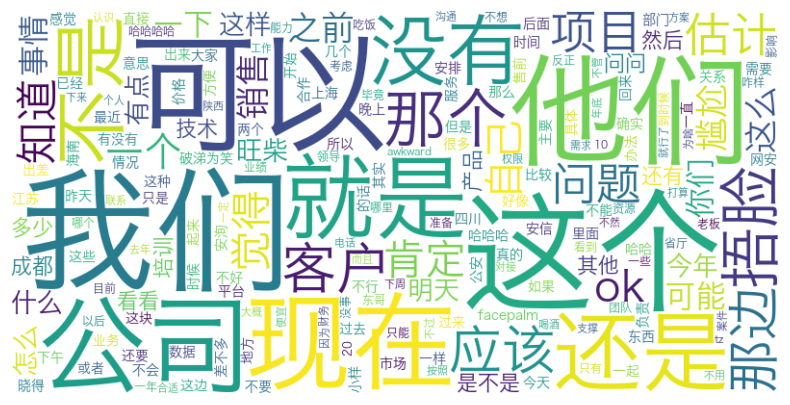

In [6]:
import os
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

# Function to directly read the json data and return text messages
def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    messages = [record['message'] for record in data]
    return messages

# Generate a word cloud from texts
def generate_word_cloud(texts):
    # Using Jieba to tokenize the Chinese text
    jieba_text = [' '.join(jieba.cut(text)) for text in texts]
    
    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(jieba_text)
    feature_names = vectorizer.get_feature_names_out()
    word_tfidf_sum = tfidf_matrix.sum(axis=0).A1
    word_scores = {word: score for word, score in zip(feature_names, word_tfidf_sum)}
    
    # Generate a word cloud image
    # the font_path is for Mac OS only, please replace with your own font path that supports Chinese
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          font_path="/System/Library/Fonts/Hiragino Sans GB.ttc").generate_from_frequencies(word_scores)
    
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Path to the JSON file
json_file_path = '../cn_extracted_messages.json'
messages = read_json_file(json_file_path)

# Generate word cloud from the messages
generate_word_cloud(messages)
